# Classification Task - BRFSS Dataset
**Dataset:** Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System (CDC)

**Goal:** Binary classification on `Data_Value_Alt` (above/below median)

**Models Used:** Neural Network (MLP), Logistic Regression, Random Forest

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

print("All libraries imported successfully!")

All libraries imported successfully!


## Load the Dataset

In [ ]:
data = pd.read_csv(r'Nutrition,_Physical_Activity,_and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20260125 (1).csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {data.shape}")
data.head()

Dataset loaded successfully!
Shape: (110880, 33)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


## Prepare the Target Variable

In [ ]:
# Remove rows where the target column has missing values
print(f"Shape before dropping missing target: {data.shape}")
data = data.dropna(subset=['Data_Value_Alt'])
print(f"Shape after dropping missing target: {data.shape}")

# Create binary target: 1 if above median, 0 otherwise
mid_val = data['Data_Value_Alt'].median()
print(f"\nMedian of Data_Value_Alt: {mid_val}")

data['Target'] = (data['Data_Value_Alt'] > mid_val).astype(int)
print(f"\nTarget distribution:")
print(data['Target'].value_counts())

Shape before dropping missing target: (110880, 33)
Shape after dropping missing target: (97666, 33)

Median of Data_Value_Alt: 31.8

Target distribution:
Target
0    49237
1    48429
Name: count, dtype: int64


## EDA - Dataset Overview

In [ ]:
print("=" * 60)
print("DATASET SHAPE AND COLUMN INSPECTION")
print("=" * 60)
print(f"\nShape: {data.shape}")
print(f"\nColumn names and data types:")
print(data.dtypes)
print(f"\nBasic Statistics:")
data.describe()

DATASET SHAPE AND COLUMN INSPECTION

Shape: (97666, 34)

Column names and data types:
YearStart                       int64
YearEnd                         int64
LocationAbbr                      str
LocationDesc                      str
Datasource                        str
Class                             str
Topic                             str
Question                          str
Data_Value_Unit                   str
Data_Value_Type                   str
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol        str
Data_Value_Footnote               str
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                       str
Total                             str
Age(years)                        str
Education                         str
Sex                               str
Income                            str
Race/Ethnicity                    str
GeoLocation                       str
Cl

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID,Target
count,97666.000000,97666.000000,97666.000000,97666.000000,97666.000000,97666.000000,97666.000000,97666.000000
mean,2017.272562,2017.272562,31.800252,31.800252,27.395236,36.767070,30.766736,0.495863
std,3.924617,3.924617,10.343087,10.343087,10.130335,11.282278,17.414247,0.499985
min,2011.000000,2011.000000,0.900000,0.900000,0.300000,3.000000,1.000000,0.000000
25%,2014.000000,2014.000000,24.900000,24.900000,20.400000,29.200000,17.000000,0.000000
50%,2017.000000,2017.000000,31.800000,31.800000,27.300000,36.500000,30.000000,0.000000
75%,2021.000000,2021.000000,37.400000,37.400000,33.300000,42.800000,45.000000,1.000000
max,2024.000000,2024.000000,85.300000,85.300000,74.700000,92.400000,78.000000,1.000000


## EDA - Missing Values

In [ ]:
print("=" * 60)
print("MISSING VALUE COUNTS PER COLUMN")
print("=" * 60)
null_counts = data.isnull().sum()
null_pct = (data.isnull().sum() / len(data)) * 100
null_table = pd.DataFrame({'Missing Count': null_counts, 'Percentage (%)': null_pct})
print(null_table[null_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

MISSING VALUE COUNTS PER COLUMN
                            Missing Count  Percentage (%)
Data_Value_Footnote_Symbol          97666      100.000000
Data_Value_Footnote                 97666      100.000000
Total                               93820       96.062089
Data_Value_Unit                     93505       95.739561
Sex                                 89974       92.124178
Education                           82282       84.248357
Race/Ethnicity                      76915       78.753097
Age(years)                          74590       76.372535
Income                              70749       72.439744
GeoLocation                          2013        2.061106


## EDA - Target Variable Distribution

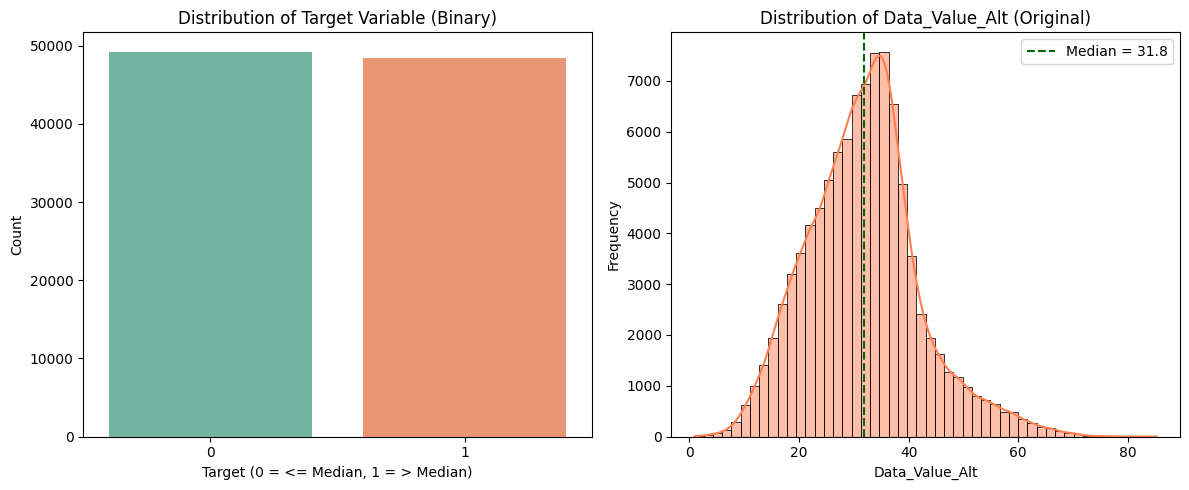

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Target class distribution
sns.countplot(x='Target', data=data, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Target Variable (Binary)')
axes[0].set_xlabel('Target (0 = <= Median, 1 = > Median)')
axes[0].set_ylabel('Count')

# Original Data_Value_Alt histogram
sns.histplot(data['Data_Value_Alt'], bins=50, kde=True, ax=axes[1], color='coral')
axes[1].axvline(mid_val, color='darkgreen', linestyle='--', label=f'Median = {mid_val}')
axes[1].set_title('Distribution of Data_Value_Alt (Original)')
axes[1].set_xlabel('Data_Value_Alt')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

## EDA - Numerical Feature Distributions

Numerical features: ['YearStart', 'YearEnd', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit ', 'LocationID']


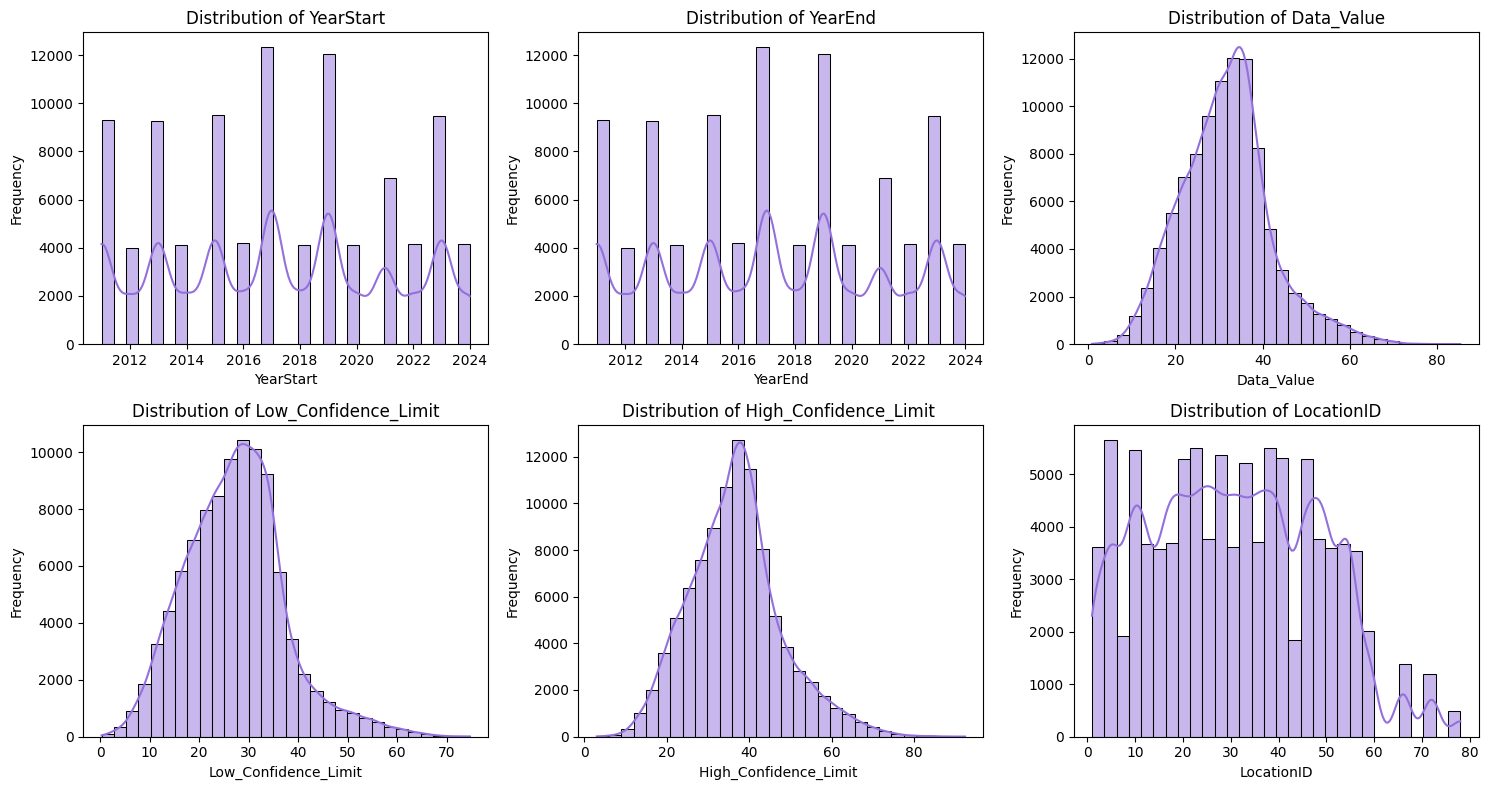

In [ ]:
all_numeric = data.select_dtypes(include=[np.number]).columns.tolist()
skip_cols = ['Target', 'Data_Value_Alt']
numeric_feats = [c for c in all_numeric if c not in skip_cols]

print(f"Numerical features: {numeric_feats}")

n_cols_plot = 3
n_rows_plot = (len(numeric_feats) + n_cols_plot - 1) // n_cols_plot

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(5 * n_cols_plot, 4 * n_rows_plot))
axes = axes.flatten()

for i, col in enumerate(numeric_feats):
    sns.histplot(data[col].dropna(), bins=30, kde=True, ax=axes[i], color='mediumpurple')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## EDA - Correlation Heatmap

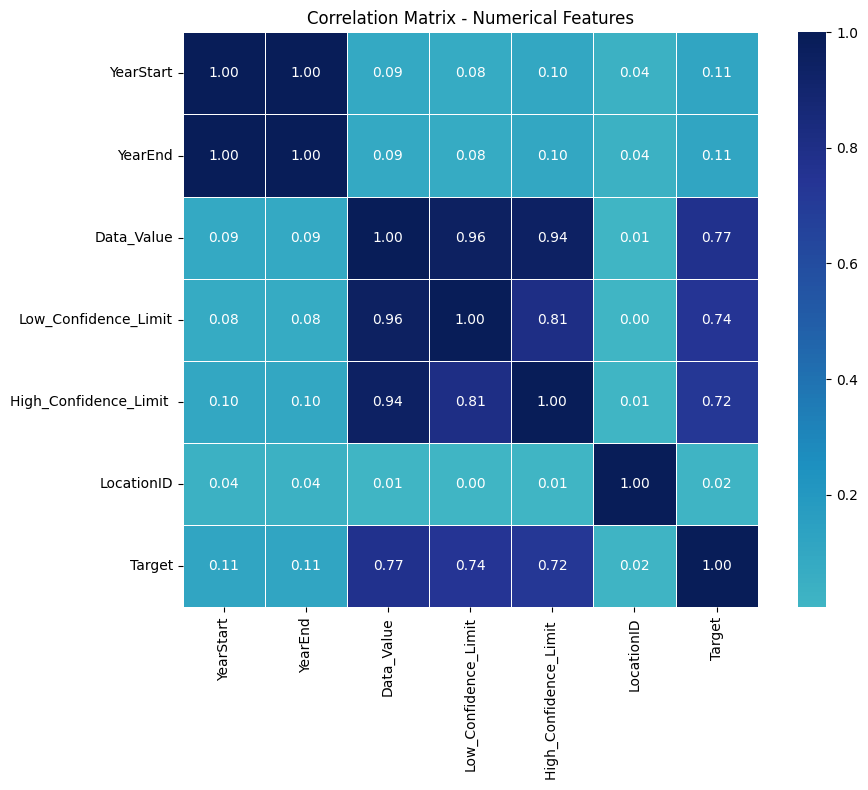

In [ ]:
corr_features = numeric_feats + ['Target']
corr_table = data[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, fmt='.2f', cmap='YlGnBu',
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.show()

## Preprocessing - Drop Unnecessary Columns

In [ ]:
drop_cols = ['Data_Value_Alt', 'Data_Value', 'Data_Value_Unit',
             'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
             'LocationDesc', 'Datasource', 'Topic', 'TopicID', 'ClassID',
             'QuestionID', 'DataValueTypeID', 'Data_Value_Type',
             'StratificationCategoryId1', 'StratificationID1',
             'LocationID', 'GeoLocation',
             'Low_Confidence_Limit', 'High_Confidence_Limit',
             'Sample_Size']

drop_cols = [c for c in drop_cols if c in data.columns]
clean_data = data.drop(columns=drop_cols)

print(f"Shape after dropping unnecessary columns: {clean_data.shape}")
print(f"\nRemaining columns: {list(clean_data.columns)}")
print(f"\nData types:\n{clean_data.dtypes}")

Shape after dropping unnecessary columns: (97666, 15)

Remaining columns: ['YearStart', 'YearEnd', 'LocationAbbr', 'Class', 'Question', 'High_Confidence_Limit ', 'Total', 'Age(years)', 'Education', 'Sex', 'Income', 'Race/Ethnicity', 'StratificationCategory1', 'Stratification1', 'Target']

Data types:
YearStart                    int64
YearEnd                      int64
LocationAbbr                   str
Class                          str
Question                       str
High_Confidence_Limit      float64
Total                          str
Age(years)                     str
Education                      str
Sex                            str
Income                         str
Race/Ethnicity                 str
StratificationCategory1        str
Stratification1                str
Target                       int64
dtype: object


## Preprocessing - Handle Missing Values

In [ ]:
# Fill numerical columns with median
numeric_columns = clean_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [c for c in numeric_columns if c != 'Target']

for col in numeric_columns:
    med = clean_data[col].median()
    clean_data[col] = clean_data[col].fillna(med)
    print(f"Filled missing values in '{col}' with median: {med}")

# Fill categorical columns with mode
categorical_columns = clean_data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    most_common = clean_data[col].mode()[0]
    clean_data[col] = clean_data[col].fillna(most_common)
    print(f"Filled missing values in '{col}' with mode: {most_common}")

print(f"\nRemaining missing values: {clean_data.isnull().sum().sum()}")

Filled missing values in 'YearStart' with median: 2017.0
Filled missing values in 'YearEnd' with median: 2017.0
Filled missing values in 'High_Confidence_Limit ' with median: 36.5
Filled missing values in 'LocationAbbr' with mode: US
Filled missing values in 'Class' with mode: Physical Activity
Filled missing values in 'Question' with mode: Percent of adults who engage in no leisure-time physical activity
Filled missing values in 'Total' with mode: Total
Filled missing values in 'Age(years)' with mode: 18 - 24
Filled missing values in 'Education' with mode: College graduate
Filled missing values in 'Sex' with mode: Female
Filled missing values in 'Income' with mode: $15,000 - $24,999
Filled missing values in 'Race/Ethnicity' with mode: Non-Hispanic White
Filled missing values in 'StratificationCategory1' with mode: Income
Filled missing values in 'Stratification1' with mode: $15,000 - $24,999

Remaining missing values: 0


## Preprocessing - Encode Categorical Variables

In [ ]:
encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    clean_data[col] = encoder.fit_transform(clean_data[col].astype(str))
    encoders[col] = encoder
    print(f"Label Encoded '{col}': {len(encoder.classes_)} unique classes")

print(f"\nFinal dataset shape: {clean_data.shape}")
clean_data.head()

Label Encoded 'LocationAbbr': 55 unique classes
Label Encoded 'Class': 3 unique classes
Label Encoded 'Question': 9 unique classes
Label Encoded 'Total': 1 unique classes
Label Encoded 'Age(years)': 6 unique classes
Label Encoded 'Education': 5 unique classes
Label Encoded 'Sex': 2 unique classes
Label Encoded 'Income': 7 unique classes
Label Encoded 'Race/Ethnicity': 8 unique classes
Label Encoded 'StratificationCategory1': 6 unique classes
Label Encoded 'Stratification1': 28 unique classes

Final dataset shape: (97666, 15)


,YearStart,YearEnd,LocationAbbr,Class,Question,High_Confidence_Limit,Total,Age(years),Education,Sex,Income,Race/Ethnicity,StratificationCategory1,Stratification1,Target
0,2011,2011,1,1,1,38.5,0,0,0,0,0,6,2,0,1
1,2011,2011,1,1,1,40.8,0,0,0,0,1,6,2,1,1
2,2011,2011,1,1,1,36.8,0,0,0,0,2,6,2,2,1
3,2011,2011,1,1,1,38.8,0,0,0,0,3,6,2,3,1
4,2011,2011,1,1,1,32.5,0,0,0,0,4,6,2,4,0


## Preprocessing - Scale Features and Train-Test Split

In [ ]:
# Separate features and target
features = clean_data.drop(columns=['Target'])
target = clean_data['Target']

col_names = features.columns.tolist()
print(f"Number of features: {len(col_names)}")
print(f"Features: {col_names}")

# Scale the features using StandardScaler
std_scaler = StandardScaler()
features_scaled = pd.DataFrame(std_scaler.fit_transform(features), columns=col_names, index=features.index)

# 80/20 stratified train-test split
train_x, test_x, train_y, test_y = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42, stratify=target
)

print(f"\nTraining set shape: {train_x.shape}")
print(f"Test set shape: {test_x.shape}")
print(f"\nTraining target distribution:\n{train_y.value_counts()}")
print(f"\nTest target distribution:\n{test_y.value_counts()}")

Number of features: 14
Features: ['YearStart', 'YearEnd', 'LocationAbbr', 'Class', 'Question', 'High_Confidence_Limit ', 'Total', 'Age(years)', 'Education', 'Sex', 'Income', 'Race/Ethnicity', 'StratificationCategory1', 'Stratification1']

Training set shape: (78132, 14)
Test set shape: (19534, 14)

Training target distribution:
Target
0    39389
1    38743
Name: count, dtype: int64

Test target distribution:
Target
0    9848
1    9686
Name: count, dtype: int64


## Helper Function - Manual Metric Computation
All metrics (Accuracy, Precision, Recall, F1) are computed manually from the confusion matrix values (TP, TN, FP, FN) without using sklearn's built-in scoring functions.

In [ ]:
def calculate_scores(actual, predicted):
    """
    Manually compute Accuracy, Precision, Recall, and F1-Score
    from the confusion matrix (TP, TN, FP, FN).
    Does NOT use sklearn's accuracy_score, precision_score, recall_score, or f1_score.
    """
    cm = confusion_matrix(actual, predicted)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    print(f"  TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}")

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return {
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4)
    }

print("Helper function defined successfully!")

Helper function defined successfully!


## Model 1 - Neural Network (MLPClassifier)

In [ ]:
print("=" * 60)
print("MODEL 1: NEURAL NETWORK (MLPClassifier)")
print("=" * 60)

# 3 hidden layers: 128, 64, 32 neurons
nn_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    learning_rate='adaptive'
)

nn_model.fit(train_x, train_y)
print("MLPClassifier trained successfully!")
print(f"Architecture: Input({train_x.shape[1]}) -> 128 -> 64 -> 32 -> Output(2)")
print(f"Number of iterations: {nn_model.n_iter_}")

# Predictions
nn_train_pred = nn_model.predict(train_x)
nn_test_pred = nn_model.predict(test_x)

# Evaluate
print("\n--- Training Set Metrics ---")
nn_train_scores = calculate_scores(train_y, nn_train_pred)
print(f"  Accuracy:  {nn_train_scores['Accuracy']}")
print(f"  Precision: {nn_train_scores['Precision']}")
print(f"  Recall:    {nn_train_scores['Recall']}")
print(f"  F1-Score:  {nn_train_scores['F1-Score']}")

print("\n--- Test Set Metrics ---")
nn_test_scores = calculate_scores(test_y, nn_test_pred)
print(f"  Accuracy:  {nn_test_scores['Accuracy']}")
print(f"  Precision: {nn_test_scores['Precision']}")
print(f"  Recall:    {nn_test_scores['Recall']}")
print(f"  F1-Score:  {nn_test_scores['F1-Score']}")

nn_num_features = train_x.shape[1]

MODEL 1: NEURAL NETWORK (MLPClassifier)
MLPClassifier trained successfully!
Architecture: Input(14) -> 128 -> 64 -> 32 -> Output(2)
Number of iterations: 61

--- Training Set Metrics ---
  TP = 37179, TN = 37335, FP = 2054, FN = 1564
  Accuracy:  0.9537
  Precision: 0.9476
  Recall:    0.9596
  F1-Score:  0.9536

--- Test Set Metrics ---
  TP = 9265, TN = 9276, FP = 572, FN = 421
  Accuracy:  0.9492
  Precision: 0.9419
  Recall:    0.9565
  F1-Score:  0.9491


## Model 2 - Logistic Regression

In [ ]:
print("=" * 60)
print("MODEL 2: LOGISTIC REGRESSION")
print("=" * 60)

# Step 1: Baseline
print("\n--- Step 1: Baseline Model ---")
log_base = LogisticRegression(random_state=42, max_iter=1000)
log_base.fit(train_x, train_y)
log_base_pred = log_base.predict(test_x)
log_base_scores = calculate_scores(test_y, log_base_pred)
print(f"  Baseline Test Accuracy: {log_base_scores['Accuracy']}")

# Step 2: Hyperparameter Tuning
print("\n--- Step 2: Hyperparameter Tuning (GridSearchCV) ---")
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

log_grid = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    log_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=0
)
log_grid.fit(train_x, train_y)
print(f"  Best Parameters: {log_grid.best_params_}")
print(f"  Best CV Score: {round(log_grid.best_score_, 4)}")

# Step 3: Feature Selection using RFE
print("\n--- Step 3: Feature Selection (RFE) ---")
log_best = log_grid.best_estimator_
log_rfe = RFE(estimator=log_best, n_features_to_select=10, step=1)
log_rfe.fit(train_x, train_y)

log_selected_cols = [f for f, s in zip(col_names, log_rfe.support_) if s]
print(f"  Selected {len(log_selected_cols)} features: {log_selected_cols}")

# Step 4: Retrain with selected features
print("\n--- Step 4: Retrain Final Model ---")
train_x_log = train_x[log_selected_cols]
test_x_log = test_x[log_selected_cols]

log_model = LogisticRegression(**log_grid.best_params_, random_state=42, max_iter=1000)
log_model.fit(train_x_log, train_y)

# Predictions
log_train_pred = log_model.predict(train_x_log)
log_test_pred = log_model.predict(test_x_log)

# Evaluate
print("\n--- Training Set Metrics ---")
log_train_scores = calculate_scores(train_y, log_train_pred)
print(f"  Accuracy:  {log_train_scores['Accuracy']}")
print(f"  Precision: {log_train_scores['Precision']}")
print(f"  Recall:    {log_train_scores['Recall']}")
print(f"  F1-Score:  {log_train_scores['F1-Score']}")

print("\n--- Test Set Metrics ---")
log_test_scores = calculate_scores(test_y, log_test_pred)
print(f"  Accuracy:  {log_test_scores['Accuracy']}")
print(f"  Precision: {log_test_scores['Precision']}")
print(f"  Recall:    {log_test_scores['Recall']}")
print(f"  F1-Score:  {log_test_scores['F1-Score']}")

log_num_features = len(log_selected_cols)

MODEL 2: LOGISTIC REGRESSION

--- Step 1: Baseline Model ---
  TP = 9103, TN = 9117, FP = 731, FN = 583
  Baseline Test Accuracy: 0.9327

--- Step 2: Hyperparameter Tuning (GridSearchCV) ---
  Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
  Best CV Score: 0.9309

--- Step 3: Feature Selection (RFE) ---
  Selected 10 features: ['LocationAbbr', 'Class', 'Question', 'High_Confidence_Limit ', 'Age(years)', 'Education', 'Sex', 'Income', 'Race/Ethnicity', 'StratificationCategory1']

--- Step 4: Retrain Final Model ---

--- Training Set Metrics ---
  TP = 36253, TN = 36467, FP = 2922, FN = 2490
  Accuracy:  0.9307
  Precision: 0.9254
  Recall:    0.9357
  F1-Score:  0.9305

--- Test Set Metrics ---
  TP = 9103, TN = 9116, FP = 732, FN = 583
  Accuracy:  0.9327
  Precision: 0.9256
  Recall:    0.9398
  F1-Score:  0.9326


## Model 3 - Random Forest Classifier

MODEL 3: RANDOM FOREST CLASSIFIER

--- Step 1: Baseline Model ---
  TP = 9280, TN = 9299, FP = 549, FN = 406
  Baseline Test Accuracy: 0.9511

--- Step 2: Hyperparameter Tuning (GridSearchCV) ---
  Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
  Best CV Score: 0.9495

--- Step 3: Feature Selection (Embedded - Feature Importances) ---

Feature Importances:
                Feature  Importance
 High_Confidence_Limit     0.707462
               Question    0.109147
           LocationAbbr    0.040253
        Stratification1    0.030636
         Race/Ethnicity    0.022237
                  Class    0.019751
                YearEnd    0.016867
              YearStart    0.016765
StratificationCategory1    0.015796
                 Income    0.008289
             Age(years)    0.006656
              Education    0.005154
                    Sex    0.000987
                  Total    0.000000

  Selected 2 features (importance > mean=0.0

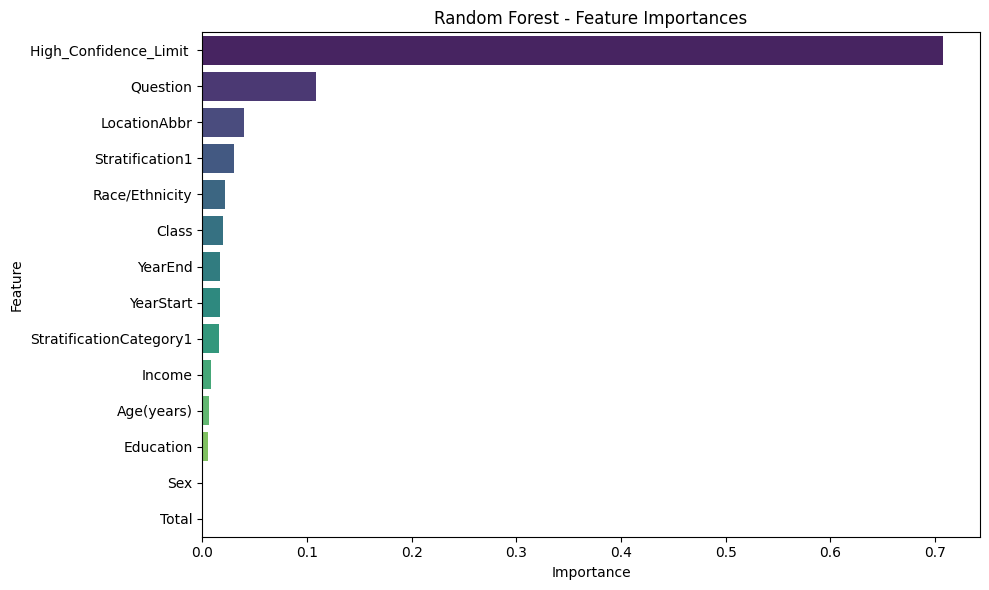


--- Step 4: Retrain Final Model ---

--- Training Set Metrics ---
  TP = 36937, TN = 34620, FP = 4769, FN = 1806
  Accuracy:  0.9158
  Precision: 0.8857
  Recall:    0.9534
  F1-Score:  0.9183

--- Test Set Metrics ---
  TP = 9200, TN = 8618, FP = 1230, FN = 486
  Accuracy:  0.9122
  Precision: 0.8821
  Recall:    0.9498
  F1-Score:  0.9147


In [ ]:
print("=" * 60)
print("MODEL 3: RANDOM FOREST CLASSIFIER")
print("=" * 60)

# Step 1: Baseline
print("\n--- Step 1: Baseline Model ---")
rf_base = RandomForestClassifier(random_state=42, n_estimators=100)
rf_base.fit(train_x, train_y)
rf_base_pred = rf_base.predict(test_x)
rf_base_scores = calculate_scores(test_y, rf_base_pred)
print(f"  Baseline Test Accuracy: {rf_base_scores['Accuracy']}")

# Step 2: Hyperparameter Tuning
print("\n--- Step 2: Hyperparameter Tuning (GridSearchCV) ---")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=0
)
rf_grid.fit(train_x, train_y)
print(f"  Best Parameters: {rf_grid.best_params_}")
print(f"  Best CV Score: {round(rf_grid.best_score_, 4)}")

# Step 3: Feature Selection using Feature Importances
print("\n--- Step 3: Feature Selection (Embedded - Feature Importances) ---")
rf_best = rf_grid.best_estimator_
feat_imp = rf_best.feature_importances_

imp_table = pd.DataFrame({
    'Feature': col_names,
    'Importance': feat_imp
}).sort_values('Importance', ascending=False)

print("\nFeature Importances:")
print(imp_table.to_string(index=False))

# Select features above the mean importance
avg_imp = feat_imp.mean()
rf_selected_cols = imp_table[imp_table['Importance'] > avg_imp]['Feature'].tolist()
print(f"\n  Selected {len(rf_selected_cols)} features (importance > mean={round(avg_imp, 4)}):")
print(f"  {rf_selected_cols}")

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_table, palette='mako')
plt.title('Random Forest - Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Step 4: Retrain with selected features
print("\n--- Step 4: Retrain Final Model ---")
train_x_rf = train_x[rf_selected_cols]
test_x_rf = test_x[rf_selected_cols]

rf_model = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
rf_model.fit(train_x_rf, train_y)

# Predictions
rf_train_pred = rf_model.predict(train_x_rf)
rf_test_pred = rf_model.predict(test_x_rf)

# Evaluate
print("\n--- Training Set Metrics ---")
rf_train_scores = calculate_scores(train_y, rf_train_pred)
print(f"  Accuracy:  {rf_train_scores['Accuracy']}")
print(f"  Precision: {rf_train_scores['Precision']}")
print(f"  Recall:    {rf_train_scores['Recall']}")
print(f"  F1-Score:  {rf_train_scores['F1-Score']}")

print("\n--- Test Set Metrics ---")
rf_test_scores = calculate_scores(test_y, rf_test_pred)
print(f"  Accuracy:  {rf_test_scores['Accuracy']}")
print(f"  Precision: {rf_test_scores['Precision']}")
print(f"  Recall:    {rf_test_scores['Recall']}")
print(f"  F1-Score:  {rf_test_scores['F1-Score']}")

rf_num_features = len(rf_selected_cols)

## Model Comparison Table

In [ ]:
print("=" * 70)
print("FINAL MODEL COMPARISON TABLE")
print("=" * 70)

results = {
    'Model': ['Neural Network (MLP)', 'Logistic Regression', 'Random Forest'],
    'Num Features': [nn_num_features, log_num_features, rf_num_features],
    'Train Accuracy': [nn_train_scores['Accuracy'], log_train_scores['Accuracy'], rf_train_scores['Accuracy']],
    'Train Precision': [nn_train_scores['Precision'], log_train_scores['Precision'], rf_train_scores['Precision']],
    'Train Recall': [nn_train_scores['Recall'], log_train_scores['Recall'], rf_train_scores['Recall']],
    'Train F1-Score': [nn_train_scores['F1-Score'], log_train_scores['F1-Score'], rf_train_scores['F1-Score']],
    'Test Accuracy': [nn_test_scores['Accuracy'], log_test_scores['Accuracy'], rf_test_scores['Accuracy']],
    'Test Precision': [nn_test_scores['Precision'], log_test_scores['Precision'], rf_test_scores['Precision']],
    'Test Recall': [nn_test_scores['Recall'], log_test_scores['Recall'], rf_test_scores['Recall']],
    'Test F1-Score': [nn_test_scores['F1-Score'], log_test_scores['F1-Score'], rf_test_scores['F1-Score']],
}

results_table = pd.DataFrame(results)
print(results_table.to_string(index=False))

FINAL MODEL COMPARISON TABLE
               Model  Num Features  Train Accuracy  Train Precision  Train Recall  Train F1-Score  Test Accuracy  Test Precision  Test Recall  Test F1-Score
Neural Network (MLP)            14          0.9537           0.9476        0.9596          0.9536         0.9492          0.9419       0.9565         0.9491
 Logistic Regression            10          0.9307           0.9254        0.9357          0.9305         0.9327          0.9256       0.9398         0.9326
       Random Forest             2          0.9158           0.8857        0.9534          0.9183         0.9122          0.8821       0.9498         0.9147


## Final Comparison - Bar Charts

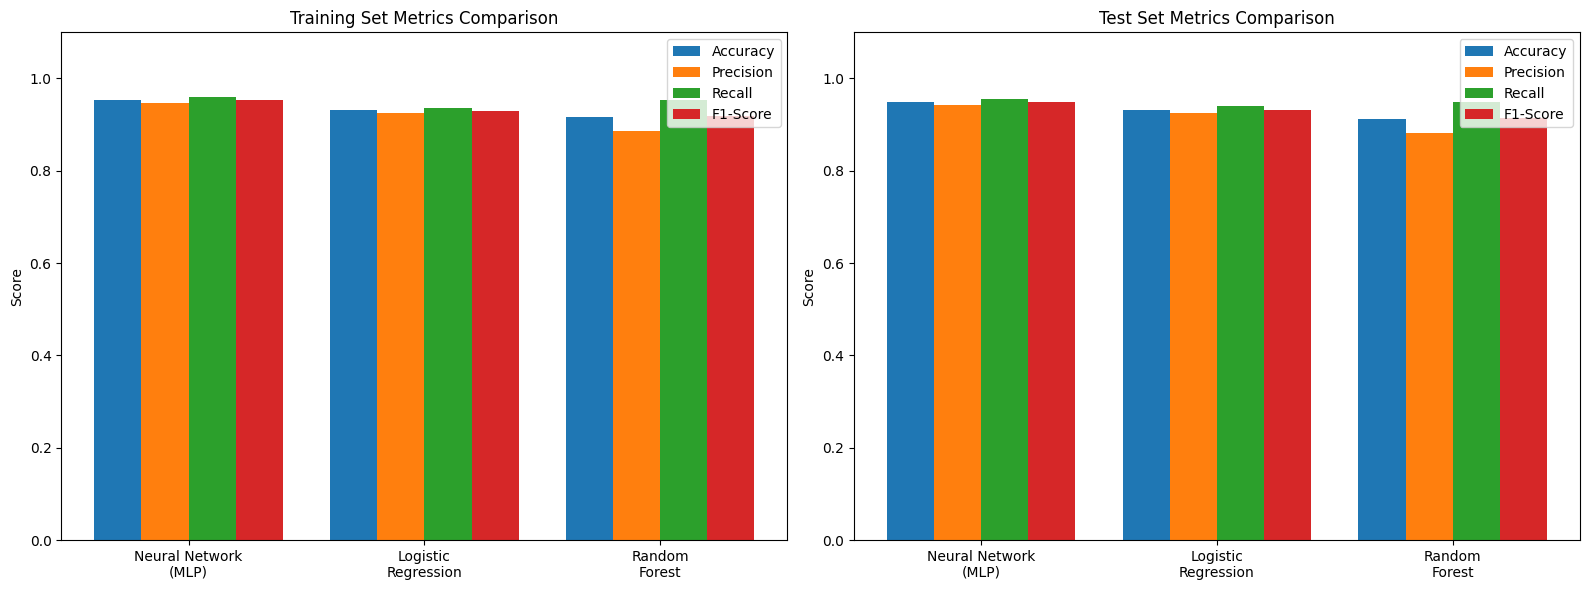


✅ Classification task completed successfully!


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

model_names = ['Neural Network\n(MLP)', 'Logistic\nRegression', 'Random\nForest']
metric_list = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
bar_colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
x = np.arange(len(model_names))
width = 0.2

# Training metrics
for i, metric in enumerate(metric_list):
    vals = [nn_train_scores[metric], log_train_scores[metric], rf_train_scores[metric]]
    axes[0].bar(x + i * width, vals, width, label=metric, color=bar_colors[i])
axes[0].set_title('Training Set Metrics Comparison')
axes[0].set_xticks(x + 1.5 * width)
axes[0].set_xticklabels(model_names)
axes[0].set_ylim(0, 1.1)
axes[0].legend()
axes[0].set_ylabel('Score')

# Test metrics
for i, metric in enumerate(metric_list):
    vals = [nn_test_scores[metric], log_test_scores[metric], rf_test_scores[metric]]
    axes[1].bar(x + i * width, vals, width, label=metric, color=bar_colors[i])
axes[1].set_title('Test Set Metrics Comparison')
axes[1].set_xticks(x + 1.5 * width)
axes[1].set_xticklabels(model_names)
axes[1].set_ylim(0, 1.1)
axes[1].legend()
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

print("\nClassification task completed successfully!")